In [1]:

import sys
import os
sys.path.append('/Users/clancy/repos/meg')


import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from numpy.linalg import norm
from dipole_class import DipoleLocalizer
from data_generator_class import DataGenerator
import mpld3

%matplotlib notebook

In [2]:
config_file = "configs/brainNoise.yaml"

# initialize dipole with config file
dip_loc = DipoleLocalizer(config_file)  #

# create DataGenerator object using configuration passed to dip_loc
dip_gen = DataGenerator(dip_loc)   #

minBrainNoise = 1e-12
maxBrainNoise = 10e-10
numDipoles = 1000
minDepthRatio = 0.5
maxDepthRatio = 0.75 
numTimeSteps = 1001

ret = dip_gen.simulate_brain_noise(minBrainNoise, maxBrainNoise, 
                                    numDipoles, minDepthRatio, maxDepthRatio, numTimeSteps)


<IPython.core.display.Javascript object>


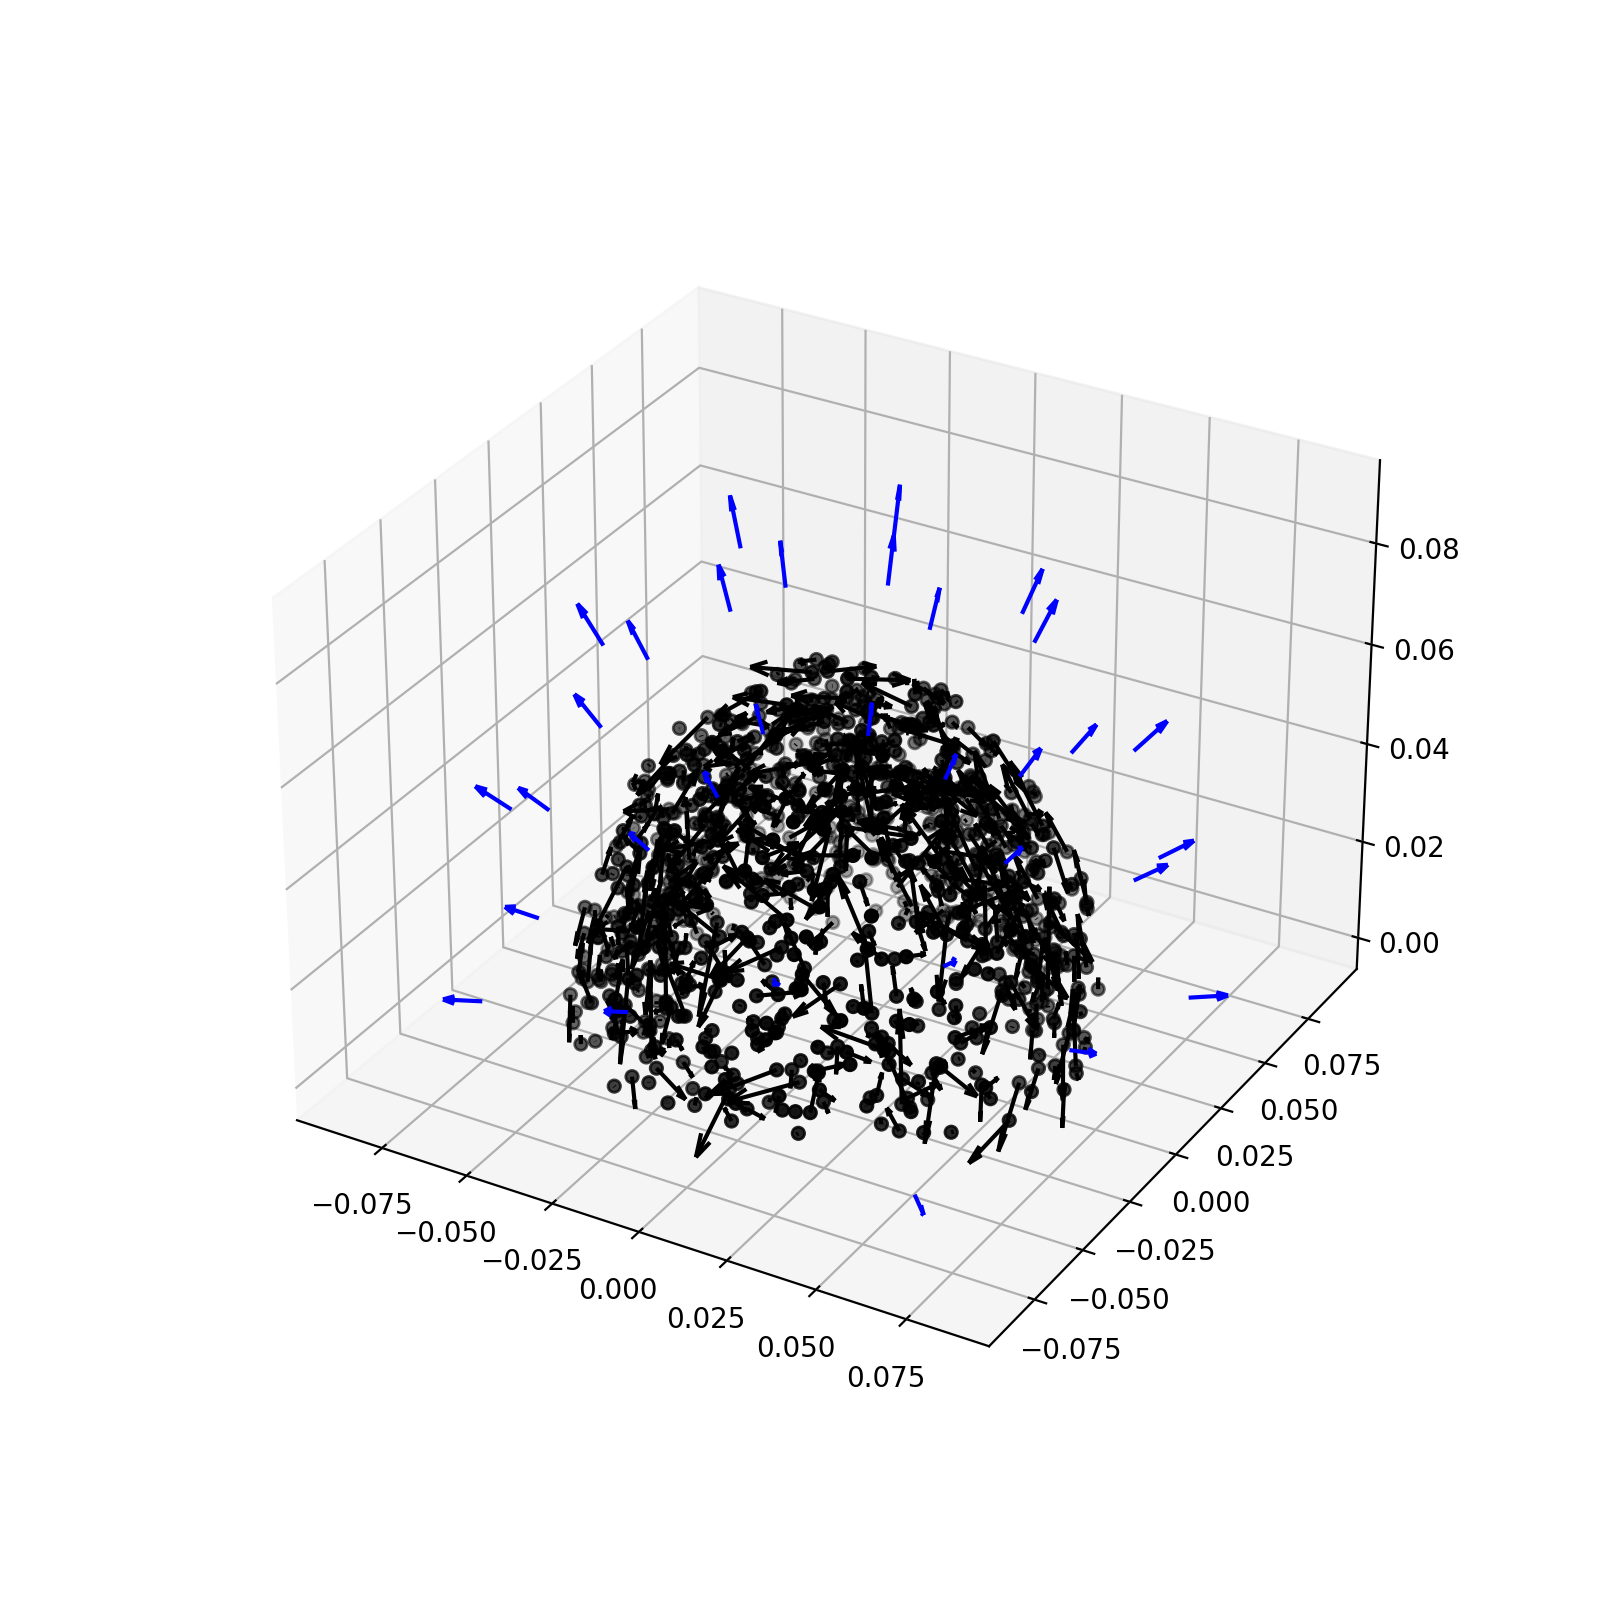

In [3]:
brainNoise = ret[0]  # rows correspond to reading on different sensors
Plist = ret[1]  # locations of 
Qlist = ret[2]
magList = np.array(ret[3])

p_true = np.array(Plist)
q_true = np.array(Qlist)
q_true = (q_true.T*magList.T).T*2e7

sensors = dip_loc.sensors
sensor_dirs = dip_loc.sensor_directions

# plot true and estimated dipole locations and moments along with sensor locations
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1, projection='3d');
scat = ax.scatter(p_true[:,0], p_true[:,1], p_true[:,2], label='True dipole', color='k')
scat = ax.quiver(p_true[:,0], p_true[:,1], p_true[:,2], q_true[:,0], q_true[:,1], q_true[:,2], color='k')
scat = ax.quiver(sensors[:,0], sensors[:,1], sensors[:,2], sensor_dirs[:,0], sensor_dirs[:,1], sensor_dirs[:,2], length=0.01, color='b')
plt.show()

# maybe show the readings at the different sensors
# take a fourier transform of the readings at the different sensors and show it decays as 1/f




<IPython.core.display.Javascript object>


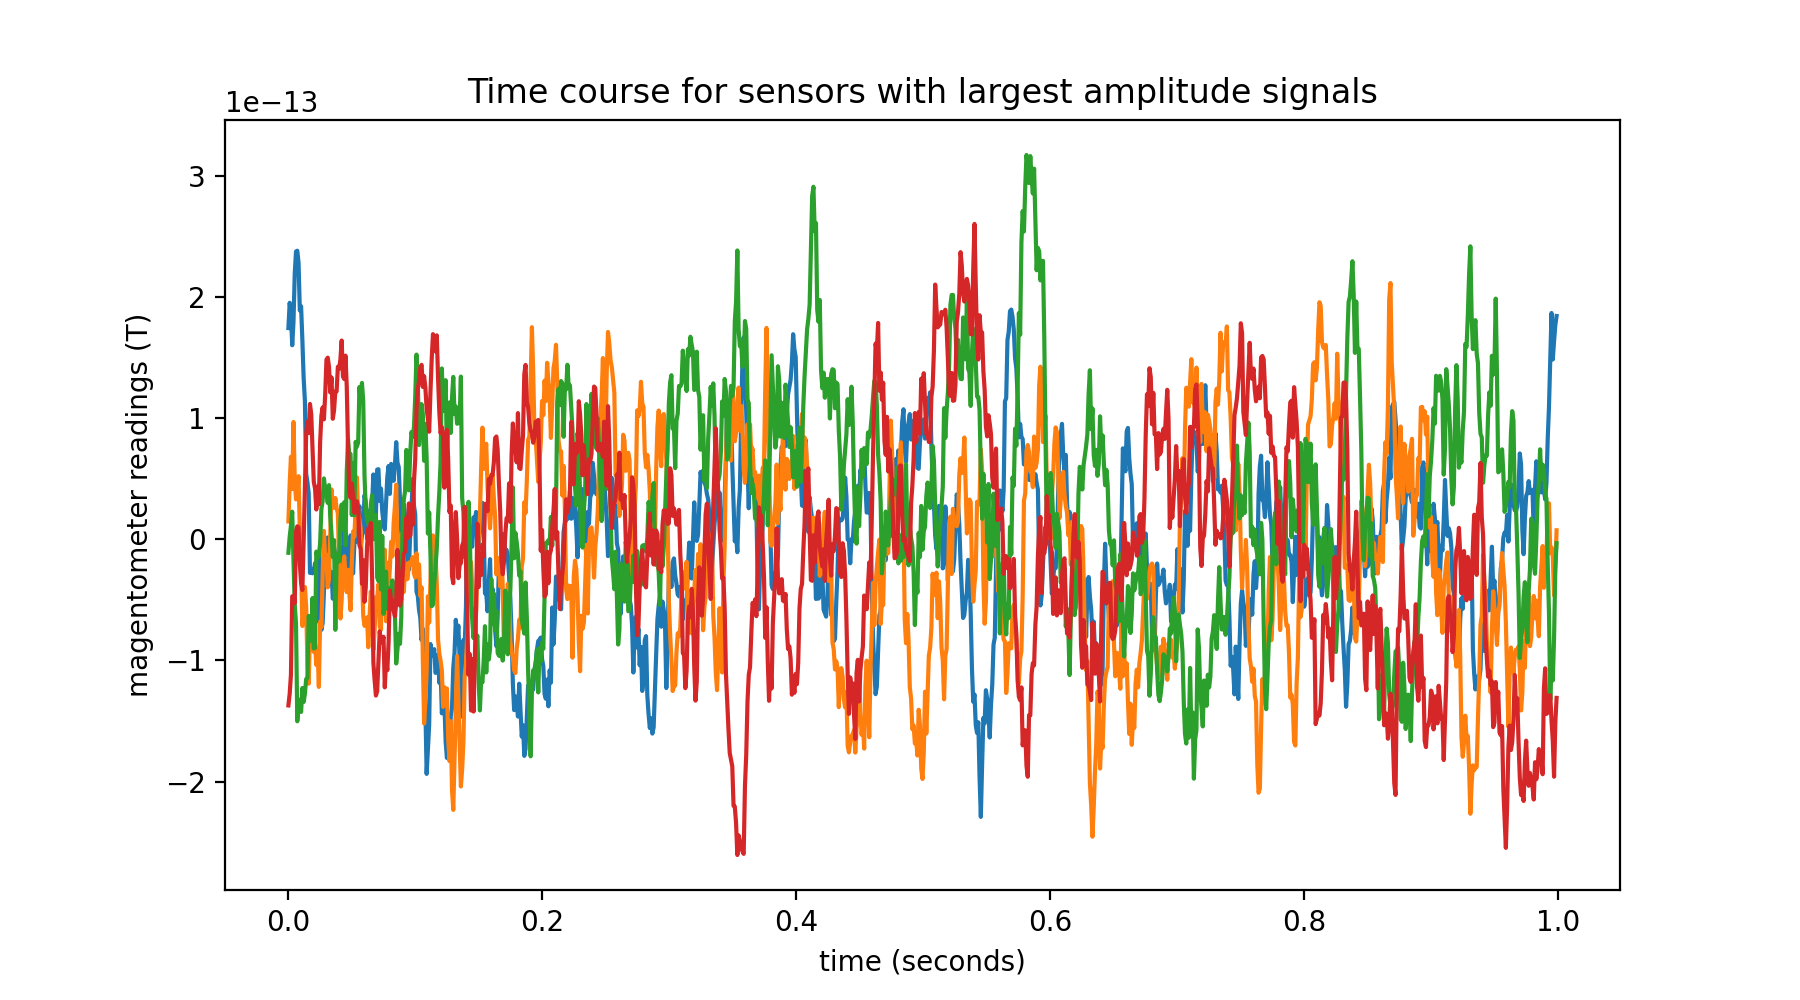

Text(0.5, 1.0, 'Time course for sensors with largest amplitude signals')

In [4]:
# take the sensors with largest magnitude over time course and look
# and their spectra
idx = np.argsort(np.linalg.norm(brainNoise, axis=1));

fig = plt.figure(figsize=(9,5))
num_to_plot = 4
plt.plot( [i/numTimeSteps for i in range(1001)],  brainNoise[ idx[0:num_to_plot], : ].T  );
plt.xlabel('time (seconds)')
plt.ylabel('magentometer readings (T)')
plt.title('Time course for sensors with largest amplitude signals')


<IPython.core.display.Javascript object>


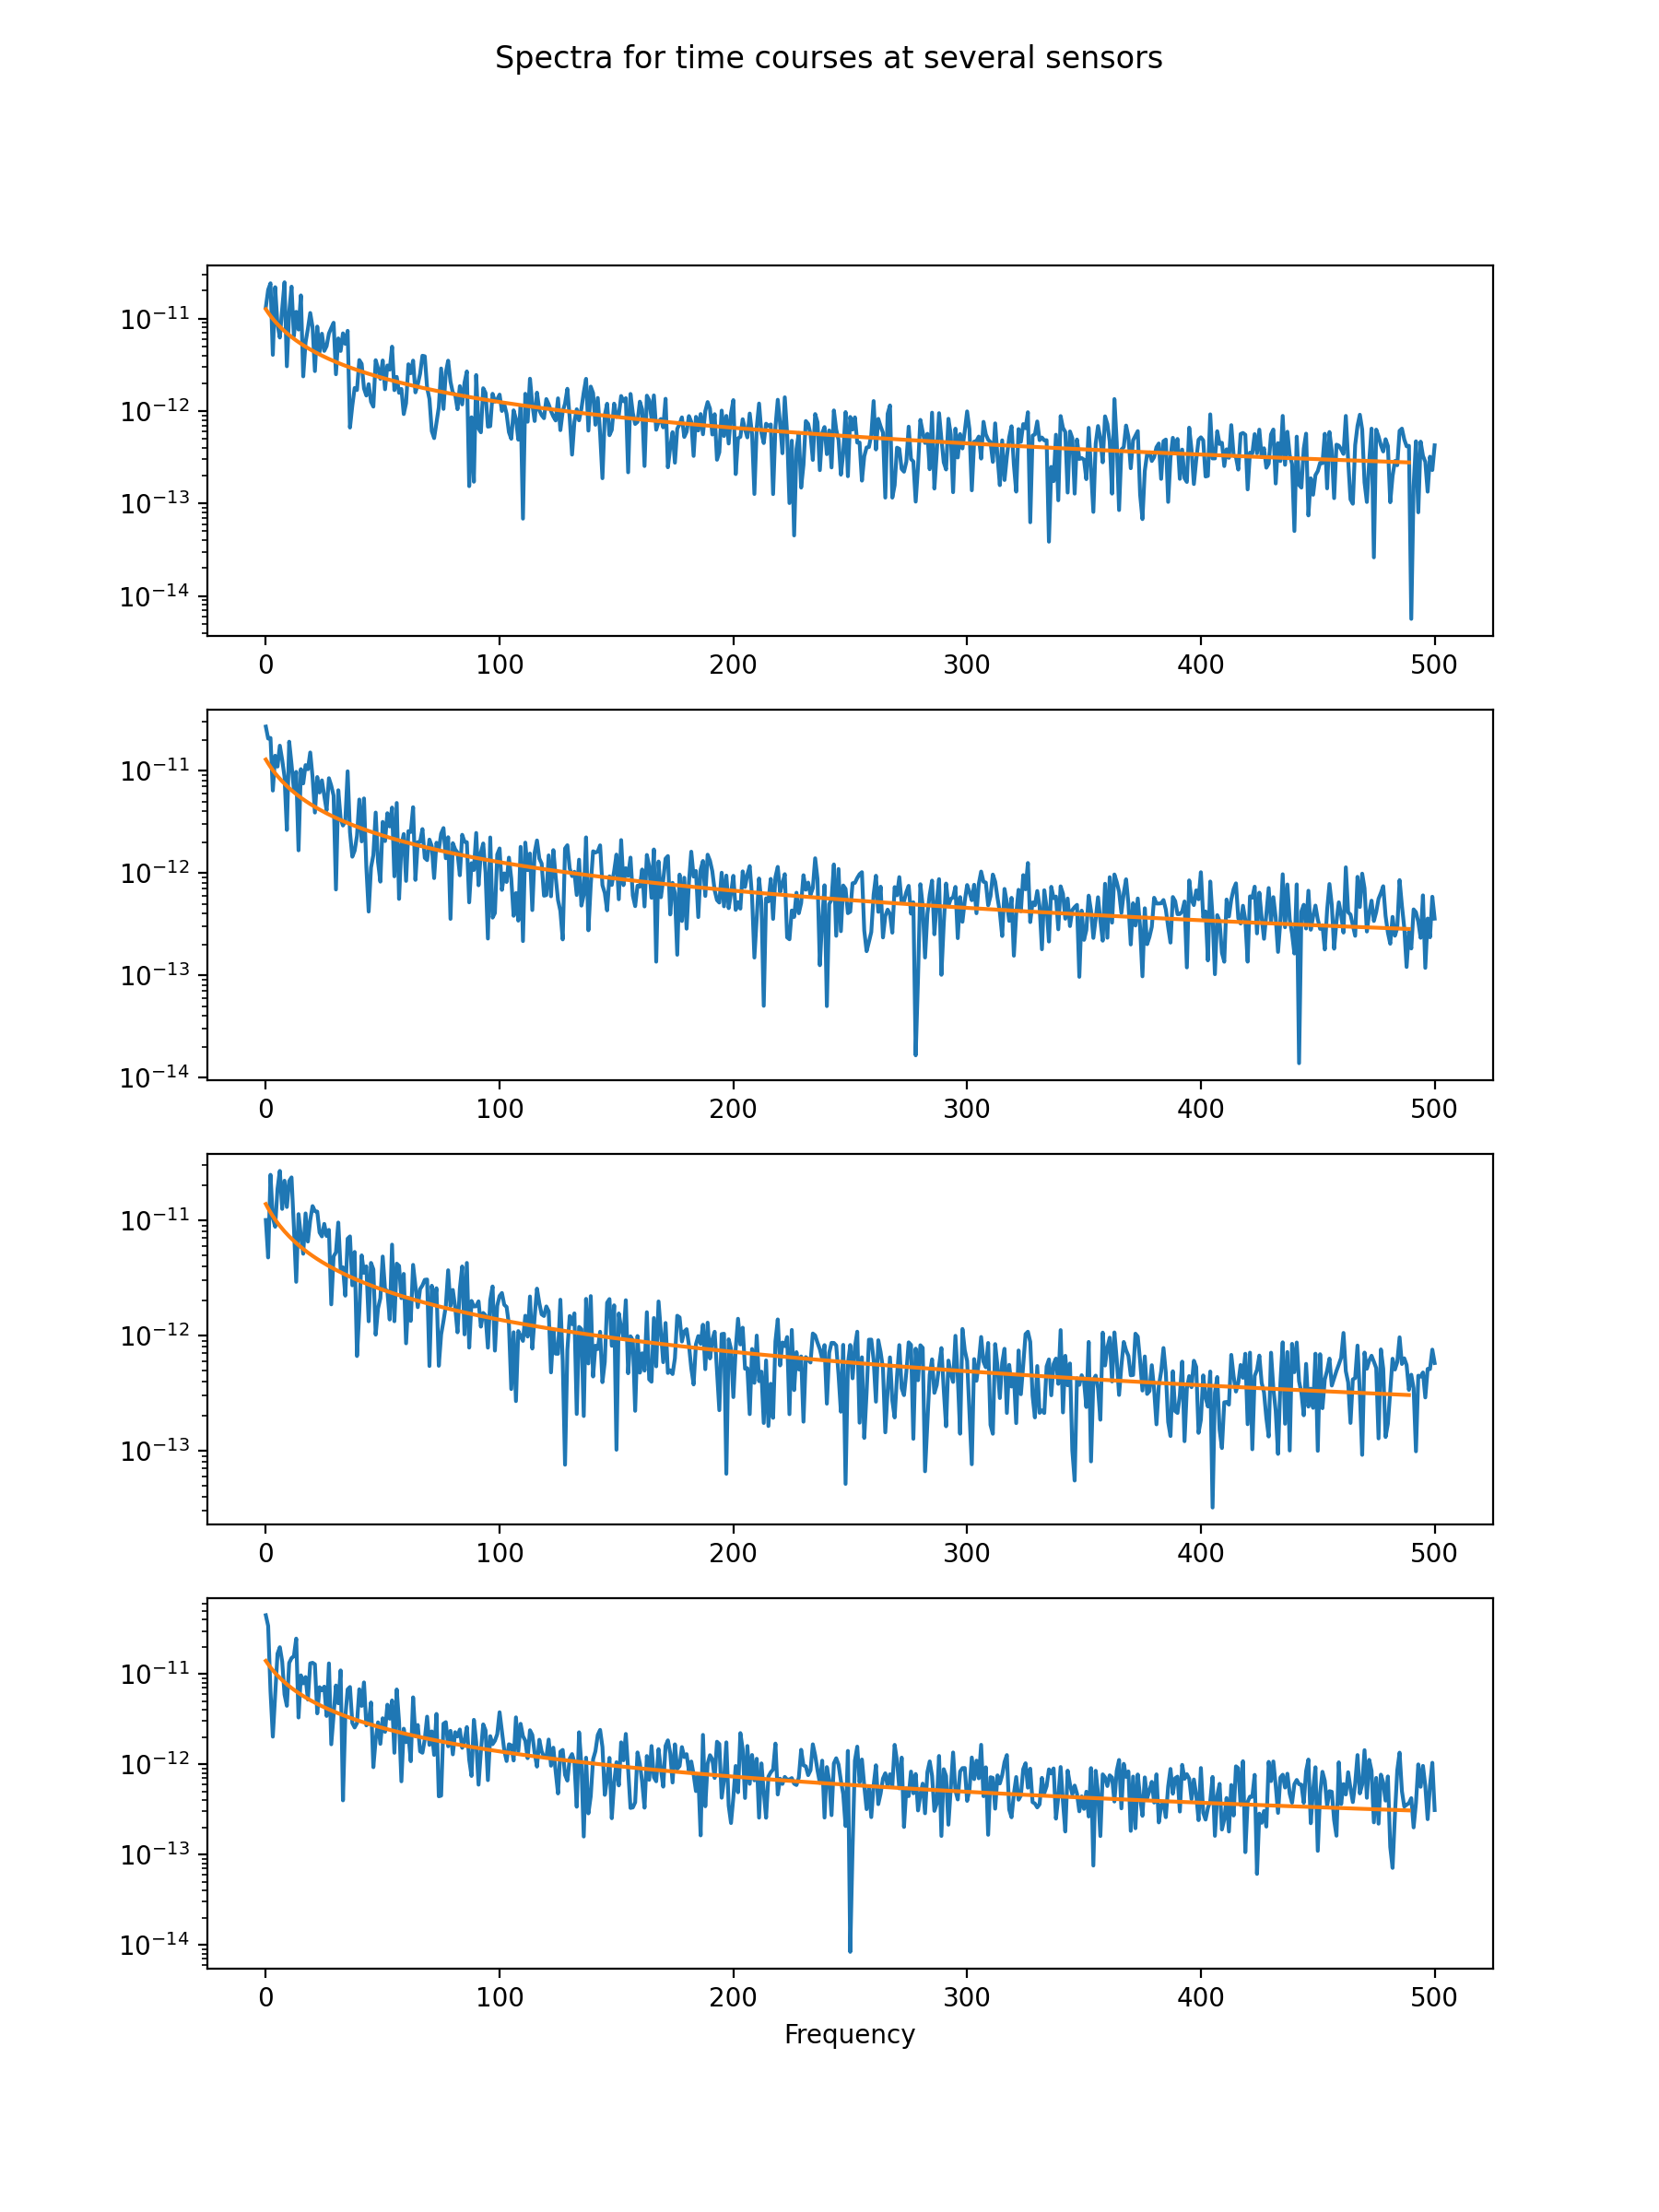

Text(0.5, 0, 'Frequency')

In [5]:
courses_to_plots = brainNoise[0:num_to_plot,:]

fig = plt.figure(figsize=(9,num_to_plot*3))
plt.suptitle('Spectra for time courses at several sensors')
for i, y in enumerate(courses_to_plots):
    plt.subplot(num_to_plot,1,i+1);
    fy = np.abs(np.fft.rfft(y));
    #plt.loglog(fy)
    #plt.loglog([10*np.mean(fy[0:10])/(j+1) for j in range(10,500)])
    plt.semilogy(fy)
    plt.semilogy([10*np.mean(fy[0:10])/(j+1) for j in range(10,500)])
plt.xlabel('Frequency')